In [5]:
#Import Necessary Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#reading the file
file_path = '/Altamash/Excelr code/PROJECTS/PROJECT_ ENERGY_PRODUCTION/Copy of Regrerssion_energy_production_data (2).csv'
df = pd.read_csv(file_path, delimiter=';')

In [7]:
#In Exploratory Data Analysis (EDA), the head() function is used to display the first few rows of a dataset.
df.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [8]:
#In Exploratory Data Analysis (EDA), the tail() function is used to display the last few rows of a dataset.
df.tail()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57
9567,17.75,49.25,1020.86,63.67,454.41


In [9]:
#to get no.of rows and columns
df.shape

(9568, 5)

In [10]:
#to get basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [11]:
# summary statistics
df.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [12]:
#checking for missing values
df.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

No missing values in the dataset


In [13]:
#checking for duplicates values
df.duplicated().sum()

41

41 duplicates in the dataset

In [14]:
#remove duplicated from the dataset
df.drop_duplicates(inplace=True)

In [15]:
#recheck for duplicates in the dataset
df.duplicated().sum()

0

**DATA VISUALIZATIONS**

For example, you may notice a trend where temperature decreases as energy production increases. This can help you understand which features might be useful in modeling.

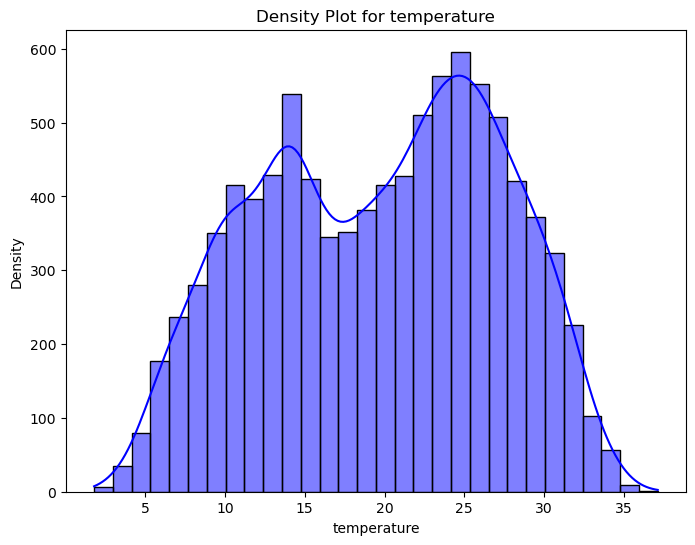

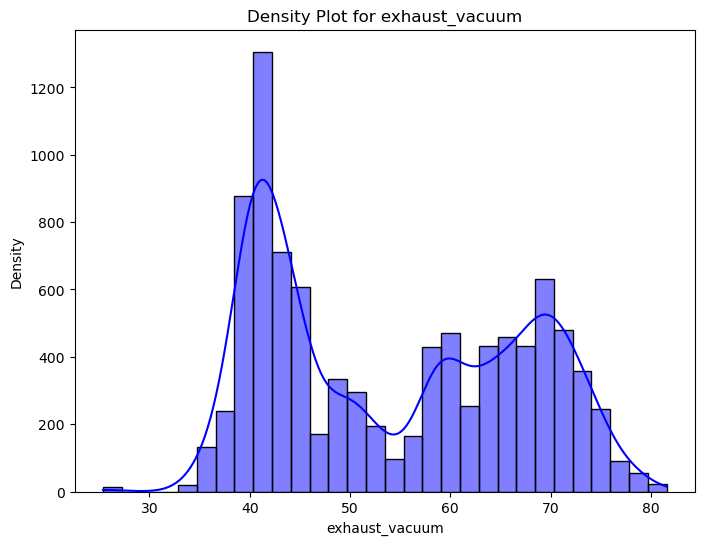

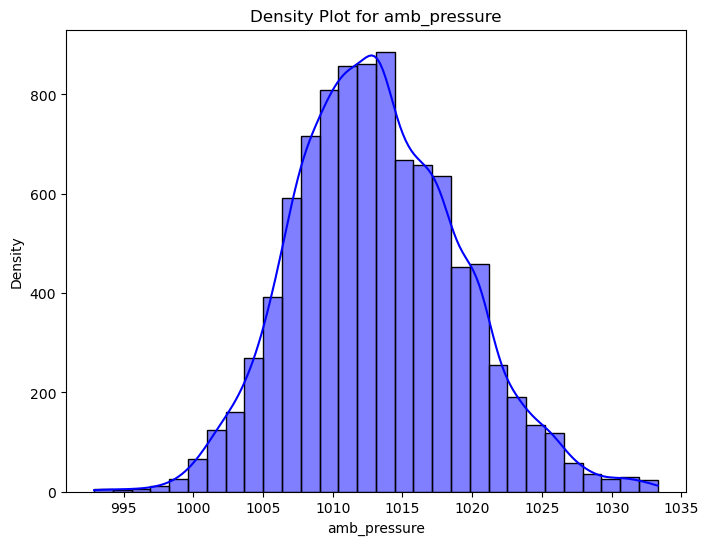

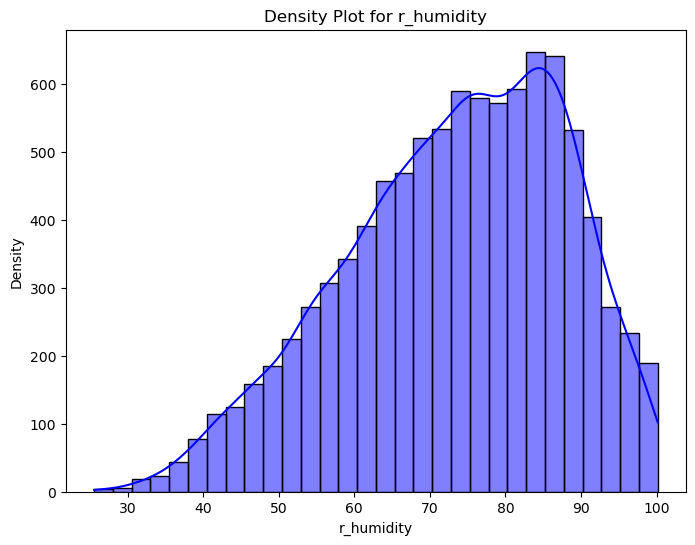

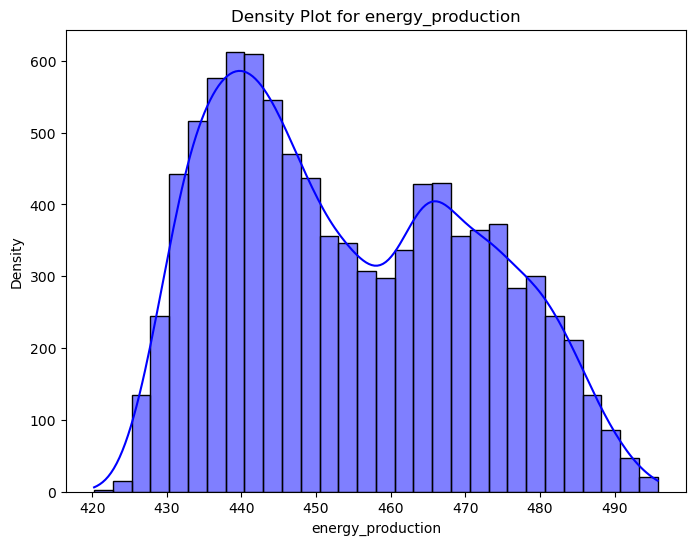

In [16]:
# Loop through each numerical column in the DataFrame
for column in df.columns:
    plt.figure(figsize=(8, 6))  # Set figure size
    sns.histplot(df[column], kde=True, bins=30, color='blue')  # Histogram with KDE overlay
    plt.title(f'Density Plot for {column}')  # Add title
    plt.xlabel(column)  # Label X-axis
    plt.ylabel('Density')  # Label Y-axis
    plt.show()  # Display the plot

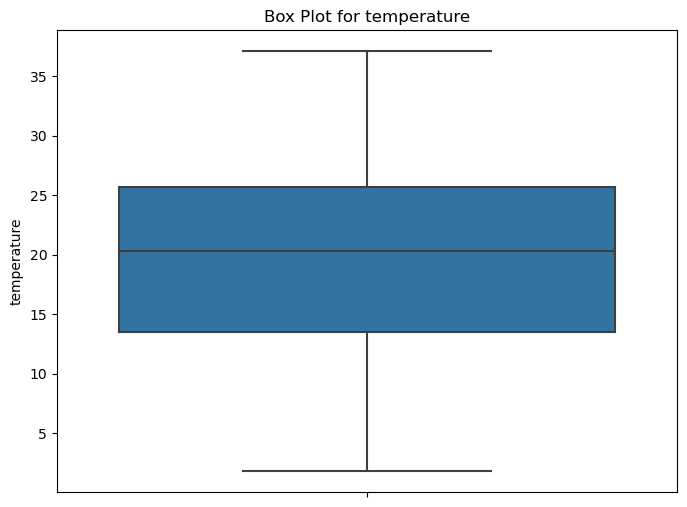

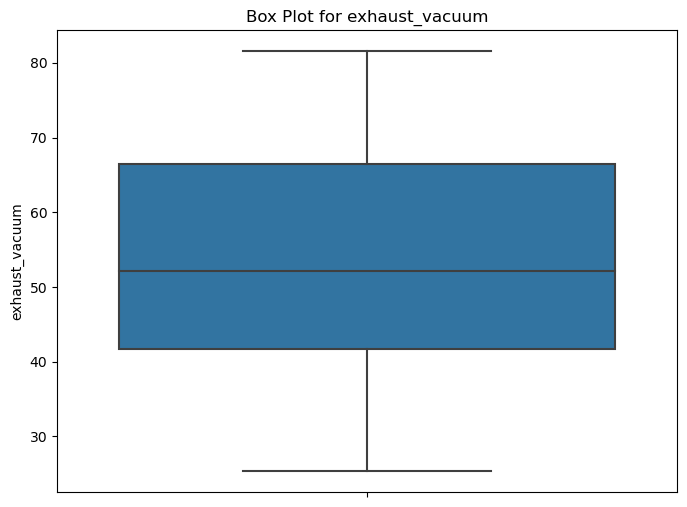

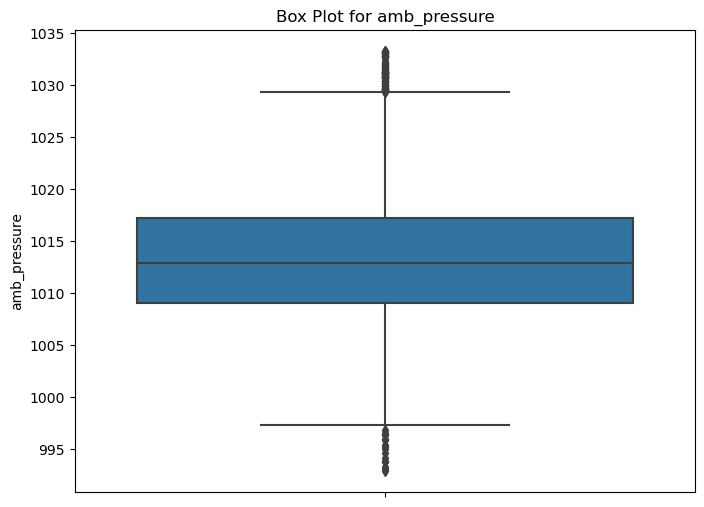

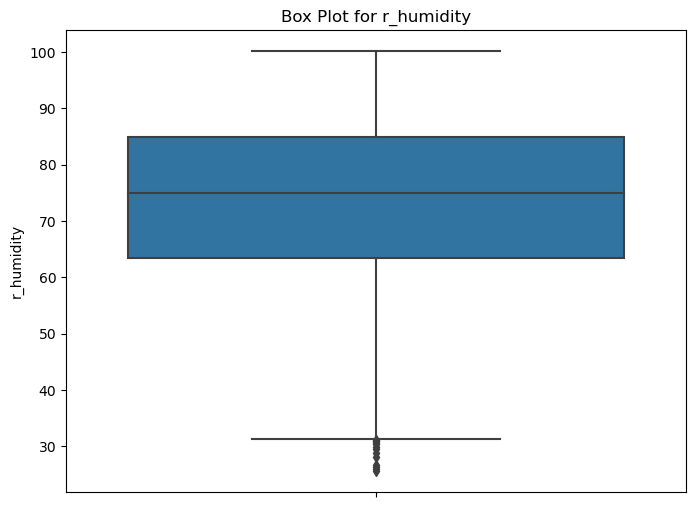

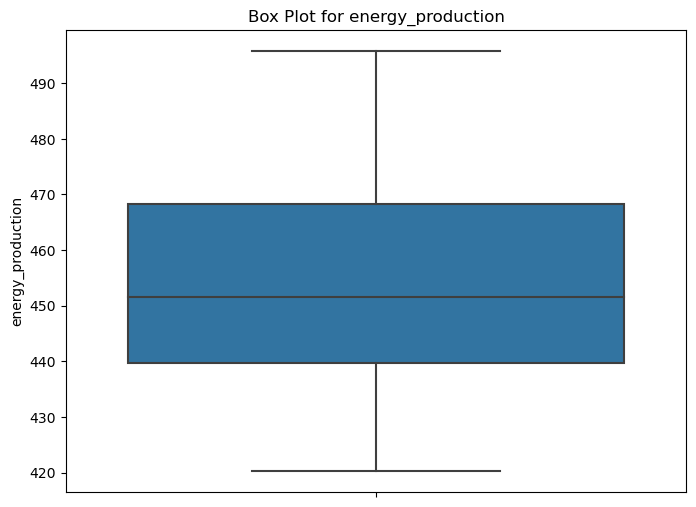

In [17]:
# Create a box plot for each numerical column
for column in df.columns:
    plt.figure(figsize=(8, 6))  # Set figure size
    sns.boxplot(y=df[column])  # Create box plot
    plt.title(f'Box Plot for {column}')  # Add title
    plt.ylabel(column)  # Label Y-axis
    plt.show()  # Display the plot

A pairplot helps you visualize relationships between variables, showing how they interact. It helps detect linear or non-linear relationships between features and the target variable (energy production).

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


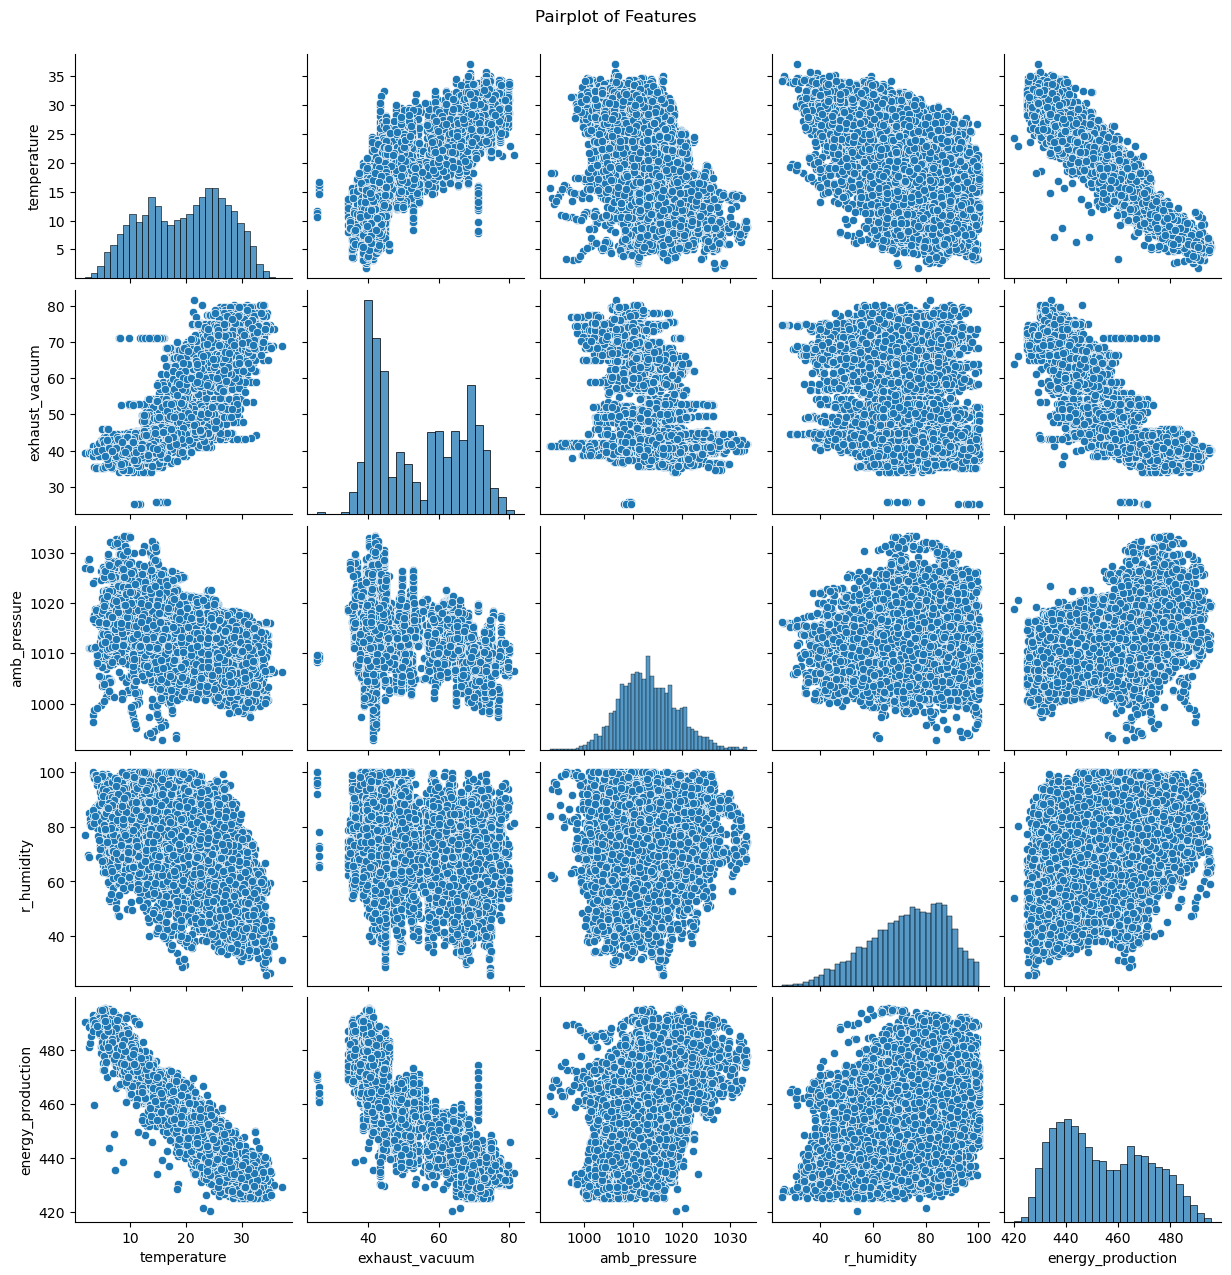

In [18]:
# Pairplots visualize relationships between features, helping to identify correlations and patterns.
sns.pairplot(df)
plt.suptitle('Pairplot of Features',y=1.02)  # Adding a title with some offset
plt.show()

In [19]:
# Correlation matrices show the relationships between variables.
df.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.843689,-0.508222,-0.543947,-0.947908
exhaust_vacuum,0.843689,1.000000,-0.415718,-0.312214,-0.869900
amb_pressure,-0.508222,-0.415718,1.000000,0.101631,0.518687
r_humidity,-0.543947,-0.312214,0.101631,1.000000,0.391175
energy_production,-0.947908,-0.869900,0.518687,0.391175,1.000000


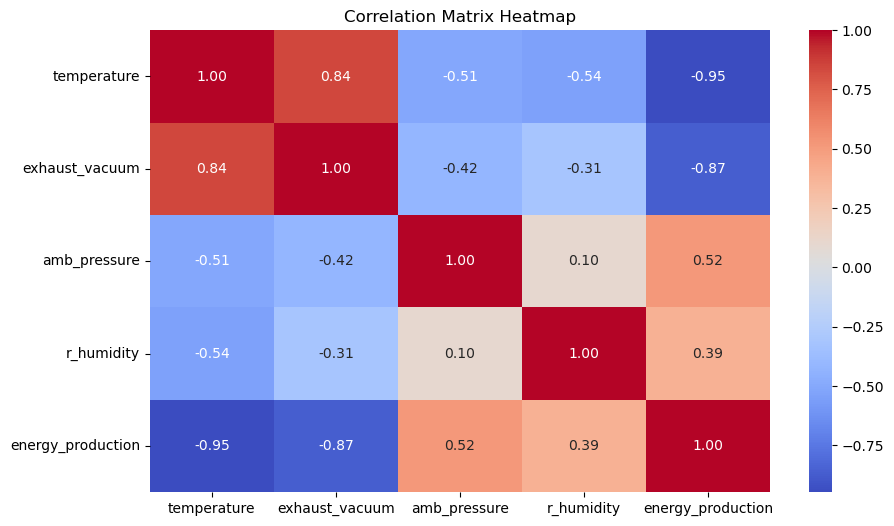

In [20]:
# A heatmap visualizes the strength of these correlations
# Correlation matrices show the relationships between variables.
# A heatmap visualizes the strength of these correlations.
correlation_matrix = df.corr()  # Compute the correlation matrix

# Plotting the heatmap
plt.figure(figsize=(10, 6))  # Setting the figure size for the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # Annotated heatmap
plt.title('Correlation Matrix Heatmap')  # Title for the heatmap
plt.show()  # Display the heatmap

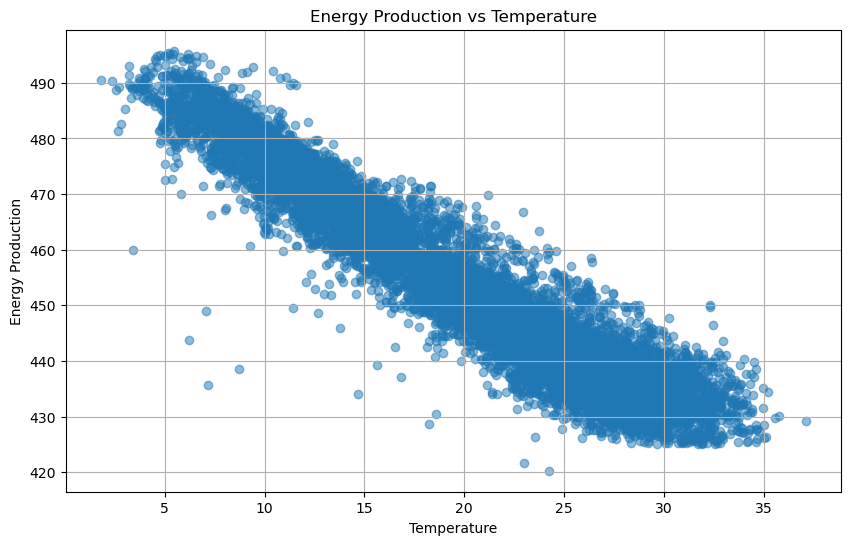

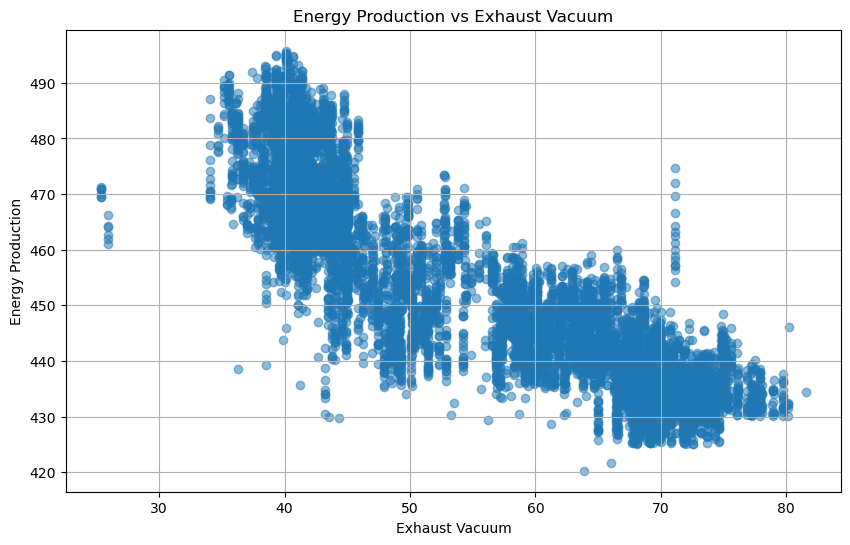

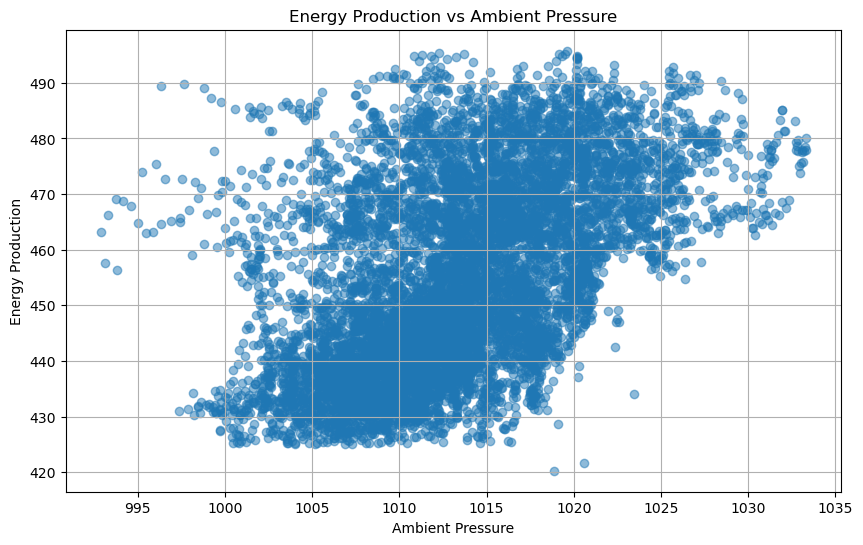

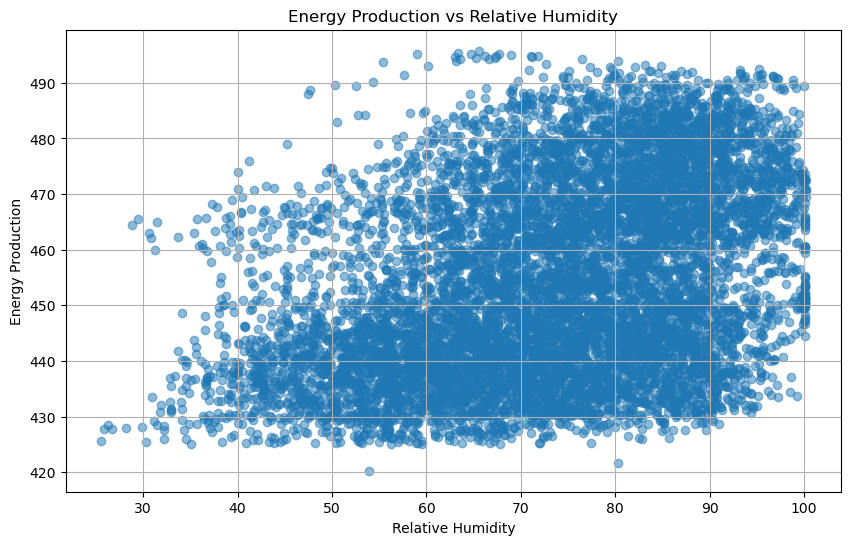

In [21]:
# Create scatter plots for each pair of numerical columns
# Create scatter plots to examine relationships between energy production and other variables

# Scatter Plot 1: Energy Production vs Temperature
plt.figure(figsize=(10, 6))  # Setting the figure size for better visibility
plt.scatter(df['temperature'], df['energy_production'], alpha=0.5)  # Scatter plot
plt.title('Energy Production vs Temperature')  # Title for the scatter plot
plt.xlabel('Temperature')  # Label for x-axis
plt.ylabel('Energy Production')  # Label for y-axis
plt.grid(True)  # Adding a grid for easier visualization
plt.show()  # Display the scatter plot

# Scatter Plot 2: Energy Production vs Exhaust Vacuum
plt.figure(figsize=(10, 6))  # Setting the figure size for better visibility
plt.scatter(df['exhaust_vacuum'], df['energy_production'], alpha=0.5)  # Scatter plot
plt.title('Energy Production vs Exhaust Vacuum')  # Title for the scatter plot
plt.xlabel('Exhaust Vacuum')  # Label for x-axis
plt.ylabel('Energy Production')  # Label for y-axis
plt.grid(True)  # Adding a grid for easier visualization
plt.show()  # Display the scatter plot

# Scatter Plot 3: Energy Production vs Ambient Pressure
plt.figure(figsize=(10, 6))  # Setting the figure size for better visibility
plt.scatter(df['amb_pressure'], df['energy_production'], alpha=0.5)  # Scatter plot
plt.title('Energy Production vs Ambient Pressure')  # Title for the scatter plot
plt.xlabel('Ambient Pressure')  # Label for x-axis
plt.ylabel('Energy Production')  # Label for y-axis
plt.grid(True)  # Adding a grid for easier visualization
plt.show()  # Display the scatter plot

# Scatter Plot 4: Energy Production vs Relative Humidity
plt.figure(figsize=(10, 6))  # Setting the figure size for better visibility
plt.scatter(df['r_humidity'], df['energy_production'], alpha=0.5)  # Scatter plot
plt.title('Energy Production vs Relative Humidity')  # Title for the scatter plot
plt.xlabel('Relative Humidity')  # Label for x-axis
plt.ylabel('Energy Production')  # Label for y-axis
plt.grid(True)  # Adding a grid for easier visualization
plt.show()  # Display the scatter plot


In [22]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Applying the IQR method to remove outliers from each feature
data_cleaned = df.copy()  # Create a copy of the data to avoid overwriting the original
for column in ['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity']:
    data_cleaned = remove_outliers_iqr(data_cleaned, column)

# Check the shape of the dataset before and after removing outliers
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {data_cleaned.shape}")


Original dataset shape: (9527, 5)
Dataset shape after removing outliers: (9425, 5)


**2.Split theand testing sets (e.g., 80% training, 20% testing). dataset into training**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
X = df[['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity']]
y = df['energy_production']

In [24]:
# Step 1: Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize and train the model
model = LinearRegression()  # Replace with your model
model.fit(x_train, y_train)

# Step 3: Make predictions on the training and test sets
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)



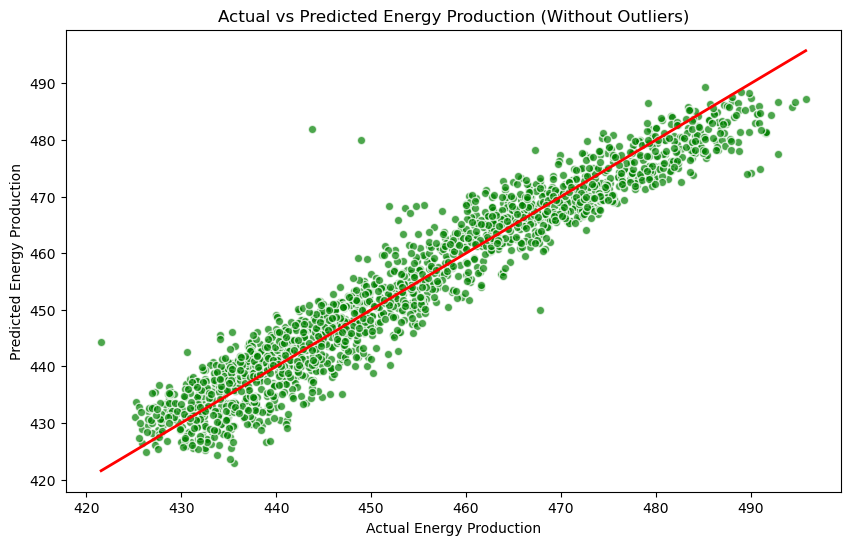

In [25]:
# Step 4: Plot actual vs predicted values for the model without outliers
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_test_pred, color='green', edgecolors='w', alpha=0.7)

# Diagonal reference line where predicted equals actual
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

# Adding labels and title
plt.xlabel('Actual Energy Production')
plt.ylabel('Predicted Energy Production')
plt.title('Actual vs Predicted Energy Production (Without Outliers)')

# Show the plot
plt.show()



**3.Train and Evaluate Different Regression Models**

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb  # Ensure you have the XGBoost package installed
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [27]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),  # Include Ridge Regression
    'Lasso Regression': Lasso(alpha=1.0),  # Include Lasso Regression
    'Elastic Net': ElasticNet(alpha=1.0, l1_ratio=0.5),  # Include Elastic Net
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Bagging Regressor': BaggingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),  # Include AdaBoost
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor()
}


In [28]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_R2 = r2_score(y_train, y_train_pred) # Calculate r2_score
    model_train_mean_absolute_error =mean_absolute_error(y_train, y_train_pred) # Calculate mean_absolute_error
    model_train_root_mean_squared_error = np.sqrt(mean_squared_error(y_train, y_train_pred))#mean_squared_error
    # Test set performance
    model_test_R2 = r2_score(y_test, y_test_pred) # Calculate r2_score
    #model_test_mean_squared_error= mean_squared_error(y_test, y_test_pred, average='weighted') # Calculate mean_square_error
    model_test_mean_absolute_error =mean_absolute_error(y_test, y_test_pred) # Calculate mean_absolute_error
    model_test_root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_test_pred))#mean_squared_error



    print(list(models.keys())[i])

    print('='*35)
    print('Model performance for Training set')
    print("- r2_score: {:.4f}".format(model_train_R2))
    print('- mean_squared_error: {:.4f}'.format(model_train_root_mean_squared_error)) #Fixed: using root_mean_squared_error instead of mean_squared_error
    print('- mean_absolute_error: {:.4f}'.format( model_train_mean_absolute_error))



    print('----------------------------------')

    print('Model performance for Test set')
    print("- r2_score: {:.4f}".format(model_test_R2))
    print('- mean_squared_error: {:.4f}'.format(model_test_root_mean_squared_error)) #Fixed: using root_mean_squared_error instead of mean_squared_error
    print('- mean_absolute_error: {:.4f}'.format( model_test_mean_absolute_error))


    print('='*35)
    print('\n')




Linear Regression
Model performance for Training set
- r2_score: 0.9284
- mean_squared_error: 4.5561
- mean_absolute_error: 3.6213
----------------------------------
Model performance for Test set
- r2_score: 0.9283
- mean_squared_error: 4.5693
- mean_absolute_error: 3.6441


Ridge Regression
Model performance for Training set
- r2_score: 0.9284
- mean_squared_error: 4.5561
- mean_absolute_error: 3.6213
----------------------------------
Model performance for Test set
- r2_score: 0.9283
- mean_squared_error: 4.5693
- mean_absolute_error: 3.6441


Lasso Regression
Model performance for Training set
- r2_score: 0.9282
- mean_squared_error: 4.5632
- mean_absolute_error: 3.6296
----------------------------------
Model performance for Test set
- r2_score: 0.9280
- mean_squared_error: 4.5798
- mean_absolute_error: 3.6538


Elastic Net
Model performance for Training set
- r2_score: 0.9279
- mean_squared_error: 4.5722
- mean_absolute_error: 3.6418
----------------------------------
Model perfo

**Conclusion:**

Based on the analysis, Random Forest, XGBoost, and GradientBoosting appear to be the top-performing models. They consistently achieve high R2-scores and low error metrics on both training and testing sets, suggesting they are well-suited for the given task.

R² Score: Measures how well the model explains the variance in the data. A higher value (closer to 1) means better performance.
Mean Absolute Error (MAE): The average of absolute differences between predicted and actual values. Lower is better.
Mean Squared Error (MSE) and Root Mean Squared Error (RMSE): Penalizes larger errors more. Lower values indicate better predictions.
Performance Comparison:
1. Linear Regression
Training set:
R²: 0.9284 (Explains ~92.8% of the variance in the training data)
MAE: 3.6213
Test set:
R²: 0.9283 (Good generalization, close to training set performance)
MAE: 3.6441
Linear Regression performs consistently well on both sets, showing no signs of overfitting.

2. Random Forest
Training set:
R²: 0.9945 (Very high accuracy on training data)
MAE: 0.8852
Test set:
R²: 0.9617 (Still performs well but slightly drops on test set)
MAE: 2.3406
Random Forest shows excellent performance but may slightly overfit the training data as the test performance is lower.

3. DecisionTreeRegressor
Training set:
R²: 1.0000 (Perfect fit, likely overfitting)
MAE: 0.0000 (No errors on the training set)
Test set:
R²: 0.9327 (Significant drop in test performance)
MAE: 2.9695
This model is likely overfitting, as it performs perfectly on the training set but much worse on the test set.

4. BaggingRegressor
Training set:
R²: 0.9923 (High accuracy on training set)
MAE: 0.9987
Test set:
R²: 0.9588 (Good generalization but slightly lower than training)
MAE: 2.4380
Bagging performs similarly to Random Forest, with slightly less test accuracy, but good overall results.

5. XGBoost
Training set:
R²: 0.9878 (Very high accuracy)
MAE: 1.3643
Test set:
R²: 0.9647 (Great generalization, slight drop compared to training)
MAE: 2.2316
XGBoost performs very well on both sets and generalizes better than Decision Trees.

6. AdaBoost
Training set:
R²: 0.8977 (Lower accuracy than other models on training)
MAE: 4.4668
Test set:
R²: 0.8892 (Similar test performance, but not as strong as others)
MAE: 4.5934
AdaBoost performs consistently, but its R² and MAE values suggest it may not be the best choice for this dataset.

7. GradientBoosting
Training set:
R²: 0.9539 (Strong performance on the training set)
MAE: 2.8113
Test set:
R²: 0.9461 (Good generalization with only a slight drop)
MAE: 2.9774
GradientBoosting performs well, slightly below XGBoost but still solid on both sets.

Summary:
XGBoost and Random Forest are top performers, showing strong results on both training and test sets.
DecisionTreeRegressor severely overfits, performing perfectly on training but not generalizing well.
Linear Regression is a simple and consistent model, providing decent performance without overfitting.
AdaBoost shows the weakest performance overall, particularly on the test set.
For balance between training and test performance, XGBoost or Random Forest wo

In [35]:
# Train the Random Forest model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Save the trained model to a file
joblib.dump(model, 'energy_model.pkl')

print('Model saved as energy_model.pkl')

Model saved as energy_model.pkl


In [36]:
import streamlit as st
import joblib
import pandas as pd

# Load the trained model
model = joblib.load('energy_model.pkl')

# Title of the Streamlit app
st.title('Energy Production Prediction')

# Add input fields for the user to provide input values
temp = st.number_input('Enter Temperature (in °C)', format="%.2f")
vacuum = st.number_input('Enter Exhaust Vacuum (in cm Hg)', format="%.2f")
pressure = st.number_input('Enter Ambient Pressure (in atm)', format="%.2f")
humidity = st.number_input('Enter Relative Humidity (in %)', format="%.2f")

# Create a button for predicting
if st.button('Predict'):
    # Create a DataFrame with input features
    input_data = pd.DataFrame([[temp, vacuum, pressure, humidity]],
                              columns=['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity'])

    # Predict using the loaded model
    prediction = model.predict(input_data)[0]

    # Display the prediction
    st.success(f'Predicted Energy Output: {prediction:.2f} MW')


In [39]:
streamlit run app.py

SyntaxError: invalid syntax (3737097518.py, line 1)

In [33]:
import streamlit as st
import joblib
import pandas as pd

# Load the trained model
model = joblib.load('energy_model.pkl')

# Title of the Streamlit app
st.title('Energy Production Prediction')

# Input fields for the user to provide input values
temp = st.number_input('Enter Temperature (in °C)', format="%.2f")
vacuum = st.number_input('Enter Exhaust Vacuum (in cm Hg)', format="%.2f")
pressure = st.number_input('Enter Ambient Pressure (in atm)', format="%.2f")
humidity = st.number_input('Enter Relative Humidity (in %)', format="%.2f")

# Create a button for predicting
if st.button('Predict'):
    # Create a DataFrame with input features
    input_data = pd.DataFrame([[temp, vacuum, pressure, humidity]],
                              columns=['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity'])

    # Predict using the loaded model
    prediction = model.predict(input_data)[0]

    # Display the prediction
    st.success(f'Predicted Energy Output: {prediction:.2f} MW')


2024-10-22 12:42:58.846 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-22 12:42:58.852 Session state does not function when running a script without `streamlit run`
